# Far Field Speckle Generation  

Speckles are granular 'random' intensity distribution patterns formed when cohefrent light is either reflected from rough surface or propagates through medium with random refractive index, the 'rough' and the 'random' being on the scale of wavelength of light. Speckle is usually considered as a nuisance in imaging applications, however, in recent times it has found use in correlation-based imaging concepts.  
Speckles can be easily simulated using simple code, utilizing some of the approximations used to describe the simplest model of laser and diffuser/surface invloved in speckle generation. 

The electric field has a complex valued representation which can be modeled as arrays of pixels containing complex numbers at each plane of consideration. The initial plane is a laser passing through circular aperture where the values inside aperture are $1$ and values outside aperture are $0$ (transmittivity of aperture is considered 100 percent while the rest is considered to block the light completely). The phase is considered uniform here as the light is considered monochromatic and paraxial approximation considered. The number of pixels in cross section of aperture should be considered less than half of the number of pixels in any of the axes in the total array considered, that is because for the image plane (which is the scaled fourier transform of diffuser plane) is represented by the same array of pixels and should be able to contain a fair amount of information, while it is lost due to finite plane size consideration (which has to be assumed for numerical simulations).       

In [1]:
import numpy as np
import matplotlib.pyplot as plt

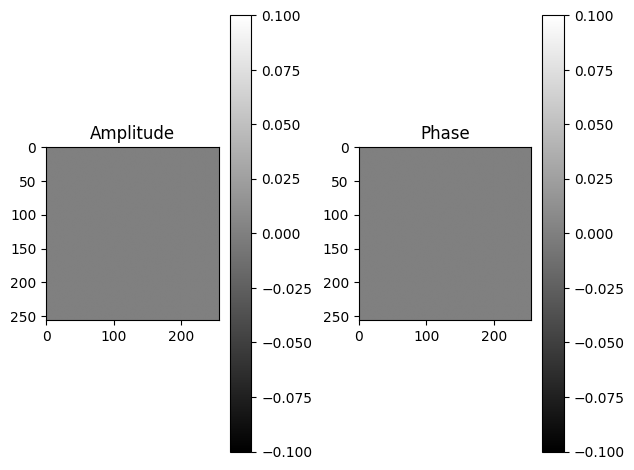

In [48]:
rows=256 # number of vertical pixels in plane considered
columns=256 # number of horizontal pixels in plane considered
aperture = np.zeros((rows,columns), dtype=complex) # Initialize a complex array of numbers for representing the elecric field

plt.subplot(1,2,1) 
plt.imshow(np.abs(aperture), cmap='gray')
plt.title('Amplitude')
plt.colorbar()


plt.subplot(1,2,2)
plt.imshow(np.angle(aperture), cmap='gray')
plt.title('Phase')
plt.colorbar()

plt.tight_layout()

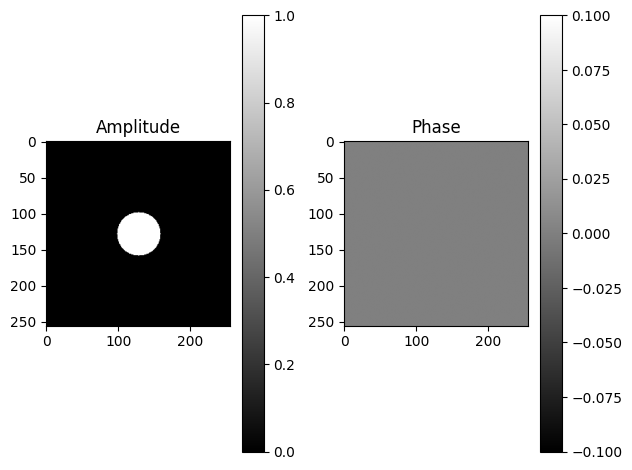

In [49]:
center = (128, 128)  # Center of the circular aperture 
radius = 30  # Radius of the circular aperture 

y, x = np.ogrid[:256, :256]
mask = (x - center[0])**2 + (y - center[1])**2 <= radius**2

aperture[mask] = 1

plt.subplot(1,2,1) 
plt.imshow(np.abs(aperture), cmap='gray')
plt.title('Amplitude')
plt.colorbar()


plt.subplot(1,2,2)
plt.imshow(np.angle(aperture), cmap='gray')
plt.title('Phase')
plt.colorbar()

plt.tight_layout()

This approximately represents a laser beam out from a circular aperture. The phase is constant assuming high directionality and plane wavefront in paraxial approximation.  
Now, we can add a diffuser screen as random fluctuations in phase in the aperture window. 

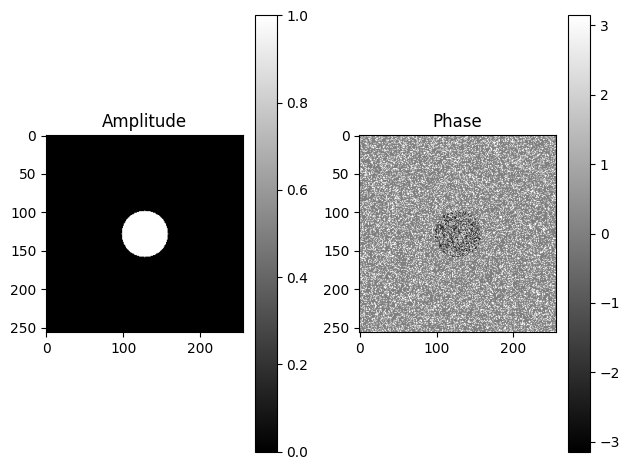

In [52]:
#aperture = np.ones((256, 256), dtype=complex)
diffuser = np.random.uniform(-1*np.pi, np.pi, (256, 256))
aperture = aperture * np.exp(1j*diffuser)

plt.subplot(1,2,1) 
plt.imshow(np.abs(aperture), cmap='gray')
plt.title('Amplitude')
plt.colorbar()


plt.subplot(1,2,2)
plt.imshow(np.angle(aperture), cmap='gray')
plt.title('Phase')
plt.colorbar()

plt.tight_layout()

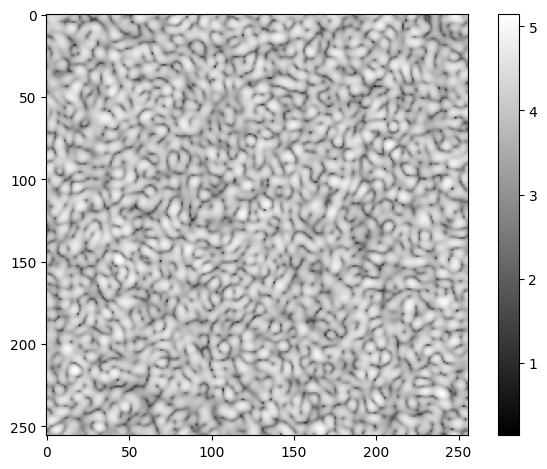

In [56]:
image_fft = np.fft.fft2(aperture) # The far field diffraction pattern or the fraunhofer regime is the scaled fourier transform of image at input plane
image_fft_shifted = np.fft.fftshift(image_fft) # This operation is performed because by default the library places zero frequencies in increasing order which is the central value for our experimental setup in images

magnitude_spectrum = np.log(np.abs(image_fft_shifted) + 1) # converted to log scale for visibility
plt.imshow(magnitude_spectrum, cmap='gray')
plt.colorbar()

plt.tight_layout()